# DESAFÍO: ANÁLISIS EXPLORATORIO DE DATOS DE LOS USUARIOS LOGUEADOS

En este cuaderno, realizaremos un análisis exploratorio de los datos relacionados con los usuarios logueados en nuestra aplicación. Nuestra principal meta es extraer información relevante para abordar aspectos cruciales con el equipo de negocios. A través de las conclusiones obtenidas, podremos profundizar en el perfil de nuestro público objetivo y evaluar la recepción que está teniendo nuestra aplicación entre el público.

#### Los datos en el DataFrame muestran información detallada sobre los usuarios logueados:

-La columna "fecha" contiene la fecha de logueo de cada usuario.
-La columna "nombre" muestra el nombre de cada usuario.
-"cp" representa el código postal del lugar de residencia del usuario.
-"edad" indica la fecha de nacimiento de cada usuario.
-"n_hijos_menores" muestra el número de hijos menores de cada usuario.
-"sexo" indica el género de cada usuario.
-"email" es la dirección de correo electrónico de cada usuario.

#### Antes de realizar el análisis, es importante abordar ciertas cuestiones de limpieza y consistencia en los datos:

    Asegurarnos de que todas las fechas en la columna "fecha" estén en un formato consistente.

    Calcular la edad real de los usuarios a partir de la fecha de nacimiento y registrarla en la columna "edad".

    Revisar y normalizar los valores en la columna "sexo" para que sean consistentes en mayúsculas o minúsculas.

    Eliminar o tratar duplicados en los nombres de usuarios para garantizar la unicidad.

    Verificar que todas las direcciones de correo electrónico sean válidas y no haya duplicados.

#### Con los datos limpios y listos para el análisis, exploraremos diversas métricas y patrones para obtener insights valiosos:

    Comportamiento de inicio de sesión: Analizaremos la frecuencia y el horario de inicio de sesión para identificar momentos de mayor actividad.

    Distribución geográfica: Investigaremos la ubicación de nuestros usuarios para conocer las regiones con mayor participación y explorar oportunidades de expansión.

    Características demográficas: Examinaremos datos como la edad, el género y la cantidad de hijos menores para entender mejor el perfil de nuestros usuarios.

    Retención y abandono: Estudiaremos la frecuencia de inicio de sesión de los usuarios y las tasas de abandono para detectar posibles áreas de mejora.

    Interacciones y preferencias: Analizaremos las acciones más comunes de los usuarios dentro de la aplicación y sus preferencias de contenido para mejorar la experiencia del usuario.

Con el análisis completo, presentaremos un informe detallado que destacará los hallazgos más relevantes y ofrecerá recomendaciones clave para enriquecer nuestra estrategia comercial. 

In [1]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Rutas
import os

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de las variables categóricas que se pueden ordenar
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
VALID_POSTAL_CODES = [
    28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009, 28010,
    28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018, 28019, 28020,
    28021, 28022, 28023, 28024, 28025, 28026, 28027, 28028, 28029, 28030,
    28031, 28032, 28033, 28034, 28035, 28036, 28037, 28038, 28039, 28040,
    28041, 28042, 28043, 28044, 28045, 28046, 28047, 28048, 28049, 28050,
    28051, 28052, 28053, 28054, 28055, 28070, 28071, 28080, 28082, 28083,
    28085, 28086, 28087
]

def generate_unique_database(num_rows):
    fake = Faker()
    database = set()
    email_set = set()

    start_date = datetime(2023, 1, 1)
    end_date = datetime.now()

    while len(database) < num_rows:
        fecha = fake.date_of_birth(minimum_age=18, maximum_age=100).strftime("%d-%m-%Y")
        nombre = fake.name()
        cp = random.choice(VALID_POSTAL_CODES)
        
        n_hijos_menores = random.randint(0, 5)
        sexo = random.choice(["M", "H"])

        while True:
            email = fake.email()
            if email not in email_set:
                email_set.add(email)
                break
        
        registration_date = fake.date_between(start_date=start_date, end_date=end_date).strftime("%d-%m-%Y")
        
        row = (registration_date, nombre, sexo, fecha, cp, n_hijos_menores, email)
        database.add(row)

    return list(database)

# Example usage:
num_rows = 500

random_database = generate_unique_database(num_rows)

# Convert the list of tuples to a DataFrame
columns = ["fecha_registro", "nombre","sexo","fecha_nacimiento", "cp", "n_hijos_menores", "email"]
df = pd.DataFrame(random_database, columns=columns)

# Display the DataFrame
df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,25-01-2023,Anna Graham,H,16-11-1938,28022,1,johnsoncourtney@example.org
1,24-04-2023,Karen Mack,M,14-09-1981,28055,5,pbrennan@example.com
2,10-02-2023,Dawn Lawson DDS,M,30-06-1960,28031,2,tara90@example.com
3,16-03-2023,Amber Salazar,H,24-02-1994,28010,4,zmartinez@example.com
4,27-06-2023,Lori Smith,M,11-08-2000,28044,5,michellegordon@example.net
...,...,...,...,...,...,...,...
495,23-01-2023,Kathy Benitez,M,05-02-1983,28017,3,robertjones@example.org
496,24-03-2023,Ashley French,M,04-08-1965,28015,3,thompsonkenneth@example.com
497,13-06-2023,Garrett Brown,M,06-05-1966,28053,0,kathleenhall@example.net
498,28-01-2023,Ashley Miller,H,02-03-1965,28009,0,adamhawkins@example.com


In [3]:
# Guardamos el DataFrame a la carpeta de "csv" con el nombre de "usuarios_logueados"
df.to_csv("csv/usuarios_logueados.csv",index=False)

In [4]:
# Leemos el DataFrame
df = pd.read_csv("csv/usuarios_logueados.csv")
df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,25-01-2023,Anna Graham,H,16-11-1938,28022,1,johnsoncourtney@example.org
1,24-04-2023,Karen Mack,M,14-09-1981,28055,5,pbrennan@example.com
2,10-02-2023,Dawn Lawson DDS,M,30-06-1960,28031,2,tara90@example.com
3,16-03-2023,Amber Salazar,H,24-02-1994,28010,4,zmartinez@example.com
4,27-06-2023,Lori Smith,M,11-08-2000,28044,5,michellegordon@example.net
...,...,...,...,...,...,...,...
495,23-01-2023,Kathy Benitez,M,05-02-1983,28017,3,robertjones@example.org
496,24-03-2023,Ashley French,M,04-08-1965,28015,3,thompsonkenneth@example.com
497,13-06-2023,Garrett Brown,M,06-05-1966,28053,0,kathleenhall@example.net
498,28-01-2023,Ashley Miller,H,02-03-1965,28009,0,adamhawkins@example.com


In [5]:
df.dtypes

fecha_registro      object
nombre              object
sexo                object
fecha_nacimiento    object
cp                   int64
n_hijos_menores      int64
email               object
dtype: object

In [6]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Tenemos valores de tipo objeto y float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_registro    500 non-null    object
 1   nombre            500 non-null    object
 2   sexo              500 non-null    object
 3   fecha_nacimiento  500 non-null    object
 4   cp                500 non-null    int64 
 5   n_hijos_menores   500 non-null    int64 
 6   email             500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


In [7]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

fecha_registro      0
nombre              0
sexo                0
fecha_nacimiento    0
cp                  0
n_hijos_menores     0
email               0
dtype: int64

### 1. Fecha_registro

In [8]:
# Convertimos la columna 'fecha_registro' a tipo datetime
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'], format='%d-%m-%Y')

### 2. Sexo

In [9]:
# De la columna de "Sexo"
df["sexo"][df["sexo"] == "M"] = 0 # mujer
df["sexo"][df["sexo"] == "H"] = 1 # hombre

# Cambio de tipo objet a tipo int
df["sexo"] = df["sexo"].astype(int)

### 3. Fecha_nacimiento

In [10]:
# Convertimos la columna 'fecha_nacimiento' a tipo datetime
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'], format='%d-%m-%Y')

In [11]:
# Calculamos la edad que tendrán hoy los usuarios
hoy = pd.to_datetime('today')
hoy

Timestamp('2023-07-27 10:44:01.431067')

In [12]:
df['edad'] = hoy.year - df['fecha_nacimiento'].dt.year
df["edad"]

0      85
1      42
2      63
3      29
4      23
       ..
495    40
496    58
497    57
498    58
499    75
Name: edad, Length: 500, dtype: int32

### 4. 

In [16]:
# Eliminación de la columna 'fecha_nacimiento', ya que ahora tenemos la edad en su lugar
df.drop(["fecha_nacimiento", "nombre", "email"], axis=1, inplace=True)

In [17]:
df

,fecha_registro,sexo,cp,n_hijos_menores,edad
0,2023-06-10,0,28028,0,81
1,2023-01-17,1,28010,4,27
2,2023-01-17,0,28021,4,24
3,2023-01-13,1,28071,3,32
4,2023-02-16,0,28051,5,65
...,...,...,...,...,...
495,2023-03-06,1,28016,3,76
496,2023-06-22,1,28050,2,64
497,2023-05-21,1,28055,2,49
498,2023-01-10,0,28006,4,25


In [18]:
df.dtypes

fecha_registro     datetime64[ns]
sexo                        int32
cp                          int64
n_hijos_menores             int64
edad                        int32
dtype: object

In [19]:
df.describe()

,fecha_registro,sexo,cp,n_hijos_menores,edad
count,500,500.000000,500.000000,500.000000,500.000000
mean,2023-04-10 03:47:31.199999744,0.488000,28036.802000,2.488000,58.866000
min,2023-01-01 00:00:00,0.000000,28001.000000,0.000000,18.000000
25%,2023-02-16 00:00:00,0.000000,28019.000000,1.000000,39.000000
50%,2023-04-09 00:00:00,0.000000,28034.000000,2.000000,59.000000
75%,2023-05-29 00:00:00,1.000000,28048.000000,4.000000,78.000000
max,2023-07-25 00:00:00,1.000000,28087.000000,5.000000,101.000000
std,NaN,0.500357,23.296615,1.687469,23.570473


In [20]:
# Para saber como de balanceados están los datos
columns_to_count =["sexo", "cp", "n_hijos_menores", "edad"]
for column in columns_to_count:
    value_counts = df[column].value_counts()
    print(column, value_counts)

sexo sexo
0    256
1    244
Name: count, dtype: int64
cp cp
28043    13
28020    13
28070    13
28028    12
28087    12
         ..
28027     4
28008     4
28053     4
28049     4
28004     2
Name: count, Length: 63, dtype: int64
n_hijos_menores n_hijos_menores
2    91
4    87
0    82
3    81
1    81
5    78
Name: count, dtype: int64
edad edad
73    12
66    11
74    11
26    11
24    10
      ..
68     2
18     2
84     2
90     2
91     1
Name: count, Length: 84, dtype: int64


#### VISUALIZACIONES POR "FECHA_REGISTRO"

In [37]:
df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email,edad,franja_edad,valor_franja_edad
0,2023-01-25,Anna Graham,1,1938-11-16,28022,1,johnsoncourtney@example.org,85,65+,3
1,2023-04-24,Karen Mack,0,1981-09-14,28055,5,pbrennan@example.com,42,25-44,1
2,2023-02-10,Dawn Lawson DDS,0,1960-06-30,28031,2,tara90@example.com,63,45-64,2
3,2023-03-16,Amber Salazar,1,1994-02-24,28010,4,zmartinez@example.com,29,25-44,1
4,2023-06-27,Lori Smith,0,2000-08-11,28044,5,michellegordon@example.net,23,17-24,0
...,...,...,...,...,...,...,...,...,...,...
495,2023-01-23,Kathy Benitez,0,1983-02-05,28017,3,robertjones@example.org,40,25-44,1
496,2023-03-24,Ashley French,0,1965-08-04,28015,3,thompsonkenneth@example.com,58,45-64,2
497,2023-06-13,Garrett Brown,0,1966-05-06,28053,0,kathleenhall@example.net,57,45-64,2
498,2023-01-28,Ashley Miller,1,1965-03-02,28009,0,adamhawkins@example.com,58,45-64,2


In [38]:
df.dtypes

fecha_registro       datetime64[ns]
nombre                       object
sexo                          int32
fecha_nacimiento     datetime64[ns]
cp                            int64
n_hijos_menores               int64
email                        object
edad                          int32
franja_edad                category
valor_franja_edad          category
dtype: object

In [42]:
# Extraemos el mes de la columna 'fecha_registro'
df['mes_registro'] = df['fecha_registro'].dt.month
df['mes_registro']

0      1
1      4
2      2
3      3
4      6
      ..
495    1
496    3
497    6
498    1
499    2
Name: mes_registro, Length: 500, dtype: int32

In [41]:
# Contamos el número de usuarios en cada mes
users_por_mes = df['mes_registro'].value_counts().sort_index()
users_por_mes

mes_registro
1    73
2    89
3    82
4    66
5    65
6    77
7    48
Name: count, dtype: int64

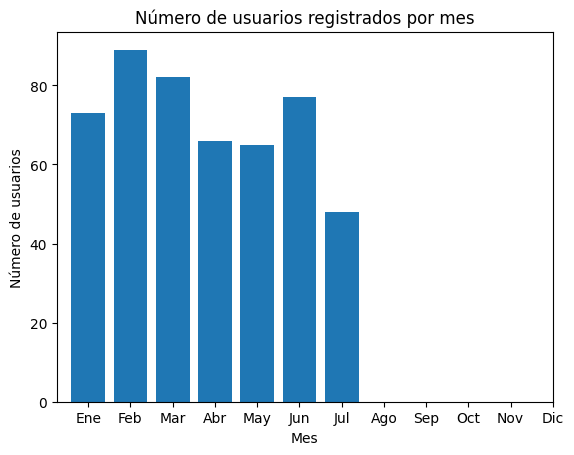

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\usuarios_por_mes.png


In [55]:

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'usuarios_por_mes.png')

# Gráfico de barras para mostrar el número de usuarios por mes
plt.bar(users_por_mes.index, users_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.title('Número de usuarios registrados por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.savefig(output_file)
plt.show()

print(f"Gráfico guardado en: {output_file}")


In [57]:

import plotly.express as px


# Filtramos el DataFrame para incluir solo fechas anteriores o iguales a la fecha actual
fecha_actual = datetime.now()
df = df[df['fecha_registro'] <= fecha_actual]

# Extraemos el mes de la columna 'fecha_registro'
df['mes_registro'] = df['fecha_registro'].dt.month

# Contamos el número de usuarios en cada mes
users_por_mes = df['mes_registro'].value_counts().sort_index()

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'usuarios_por_mes_dinámico.png')

# Creamos un gráfico interactivo de barras con plotly
fig = px.bar(x=users_por_mes.index, y=users_por_mes.values,
             labels={'x': 'Mes', 'y': 'Número de usuarios'},
             title='Número de usuarios registrados por mes (hasta la fecha actual)',
             text=users_por_mes.values,
             template='plotly_white')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickvals=list(range(1, 13)), xaxis_ticktext=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Ajustamos el tamaño del gráfico
fig.update_layout(height=600) 

# Guardamos y mostramos el gráfico interactivo
fig.write_html(output_file)
fig.show()

print(f"Gráfico guardado en: {output_file}")


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\usuarios_por_mes_dinámico.png


<details>
<summary>Explicación detallada del gráfico de números de usuarios registrados por mes</summary>
<p>
El gráfico interactivo de barras muestra la cantidad de usuarios que se han logueado por mes, permitiendo una visualización clara de los resultados. En particular, destaca que en el mes de febrero hubo un total de 89 personas logueadas, siendo el mes con mayor cantidad de usuarios registrados. Esta representación gráfica facilita la comprensión rápida de la evolución mensual del número de usuarios logueados, lo que resulta útil para evaluar si las mejoras o cambios implementados en nuestra aplicación web han generado un mayor interés por parte de los usuarios. La simplicidad del gráfico hace que sea una herramienta efectiva para monitorear el rendimiento y la recepción de la plataforma a lo largo del tiempo.



</p>
</details>

### VISUALIZACIONES DE LA VARIABLE DE "SEXO"

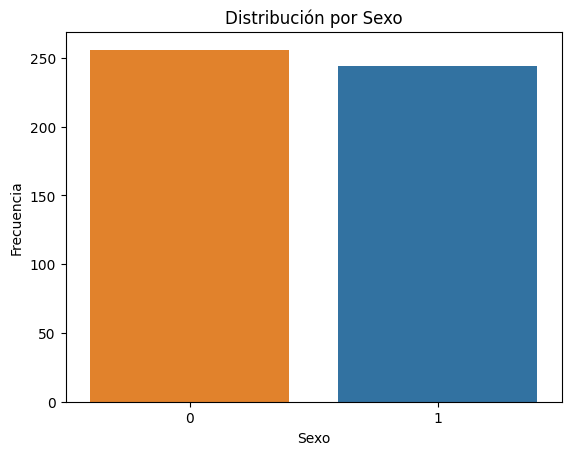

In [21]:
# Representar la variable de "sexo"
custom_palette = {0: "#FF800E", 1: "#1F75B4"}


sns.countplot(x="sexo", data=df, palette= custom_palette)
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

In [22]:

current_dir = os.getcwd()
current_dir = os.path.join(current_dir, )

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_sexo.png


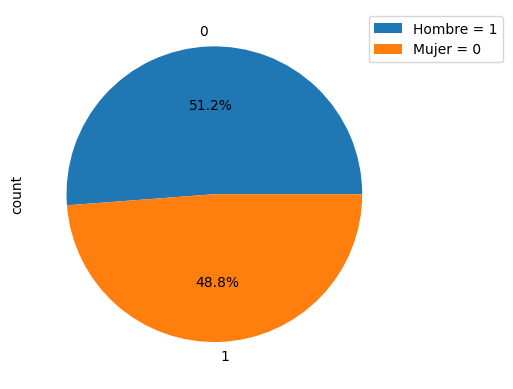

In [23]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_sexo.png') # Ruta donde se guardará la imagen creada

# Mostramos el balanceo de datos 
fig2 = df['sexo'].value_counts().plot.pie(autopct="%.1f%%")

# Añadimos una leyenda personalizada
etiquetas_leyenda = ['Hombre = 1', 'Mujer = 0']
plt.legend(labels=etiquetas_leyenda, loc='upper right', bbox_to_anchor=(1.3, 1))

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")


<details>
<summary>Explicación detallada de la variable "sexo"</summary>
<p>
A través de los gráficos realizados, se evidencia que la cantidad de usuarios hombres y mujeres en la aplicación web es equilibrada, con una leve inclinación hacia el género masculino, que representa aproximadamente el 52.4% de los usuarios. Sin embargo, esta diferencia es mínima y no puede considerarse significativa para afirmar que los usuarios hombres son mayoritarios. En consecuencia, podemos concluir que la aplicación es relevante y atractiva para ambos sexos de manera casi igualitaria. El equilibrio de género en la base de usuarios refuerza la idea de que la aplicación tiene un amplio alcance y aceptación en el público, independientemente del género.
</p>
</details>

### VISUALIZACIONES DE LA VARIABLE "EDAD"

<details>
<summary>Explicación detallada de la variable "edad"</summary>
<p>
En este análisis, realizaremos un agrupamiento de las edades para crear franjas de edad significativas. Posteriormente, asignaremos a cada franja un valor [0, 1, 2, 3] para facilitar la identificación de las categorías de edad predominantes y para analizar el conocimiento del calor en la educación en función de estas franjas.

Las franjas de edad se definirán de la siguiente manera:

- 18-24 años: Jóvenes adultos.
- 25-44 años: Adultos jóvenes y de mediana edad.
- 45-64 años: Adultos mayores.
- 65 años y más: Personas en edad de jubilación.

Asignar valores numéricos a cada franja nos permitirá realizar comparaciones cuantitativas y determinar con mayor claridad cómo el conocimiento sobre el calor en la educación se distribuye entre los diferentes grupos de edad.

Al utilizar esta metodología, podremos identificar qué franja de edad tiene mayor conocimiento sobre el tema, cuál es la más receptiva a la información y en qué segmento de la población se debe enfocar más esfuerzos para mejorar la comprensión y conciencia sobre este tema.</p>
</details>

In [47]:
print(df["edad"].max()) # Máxima
print(df["edad"].min()) # Mínima

101
18


In [48]:
# Definimos las franjas de edad
edades = [17, 25, 45, 65, float('inf')]
etiquetas = ['17-24', '25-44', '45-64', '65+']

# Usamos pd.cut() para crear los intervaloes
df['franja_edad'] = pd.cut(df['edad'], bins=edades, labels=etiquetas)

In [49]:
# Definimos el diccionario de mapeo para asignar valores específicos a cada categoría de edad
valor_por_franja = {'17-24': 0, 
                    '25-44': 1, 
                    '45-64': 2, 
                    '65+': 3}

# Aplicamos el mapeo para asignar los valores correspondientes a la columna 'franja_edad'
df['valor_franja_edad'] = df['franja_edad'].map(valor_por_franja)

df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email,edad,franja_edad,valor_franja_edad,mes_registro
0,2023-01-25,Anna Graham,1,1938-11-16,28022,1,johnsoncourtney@example.org,85,65+,3,1
1,2023-04-24,Karen Mack,0,1981-09-14,28055,5,pbrennan@example.com,42,25-44,1,4
2,2023-02-10,Dawn Lawson DDS,0,1960-06-30,28031,2,tara90@example.com,63,45-64,2,2
3,2023-03-16,Amber Salazar,1,1994-02-24,28010,4,zmartinez@example.com,29,25-44,1,3
4,2023-06-27,Lori Smith,0,2000-08-11,28044,5,michellegordon@example.net,23,17-24,0,6
...,...,...,...,...,...,...,...,...,...,...,...
495,2023-01-23,Kathy Benitez,0,1983-02-05,28017,3,robertjones@example.org,40,25-44,1,1
496,2023-03-24,Ashley French,0,1965-08-04,28015,3,thompsonkenneth@example.com,58,45-64,2,3
497,2023-06-13,Garrett Brown,0,1966-05-06,28053,0,kathleenhall@example.net,57,45-64,2,6
498,2023-01-28,Ashley Miller,1,1965-03-02,28009,0,adamhawkins@example.com,58,45-64,2,1


In [50]:
# Comprobamos que no hay valores Nan
df["valor_franja_edad"].isnull().sum()

0

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_franja_edad.png


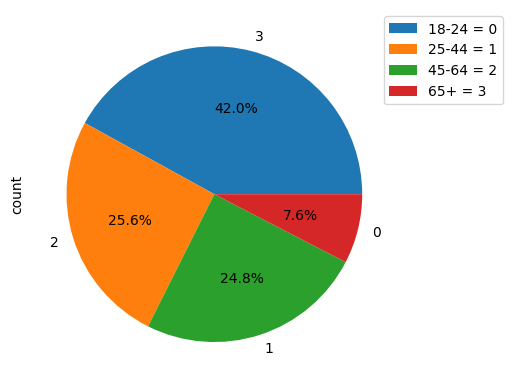

In [35]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_franja_edad.png') # Ruta donde se guardará la imagen creada

# Mostramos el balanceo de datos 
fig2 = df['valor_franja_edad'].value_counts().plot.pie(autopct="%.1f%%")

# Añadimos una leyenda
etiquetas_franjas = ['18-24 = 0', '25-44 = 1', '45-64 = 2', '65+ = 3']
plt.legend(labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.3, 1))

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")

In [32]:
# Para que el dataframe se vea entero las filas
# pd.set_option('display.max_rows', None)

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_franja_edad_espaciado.png


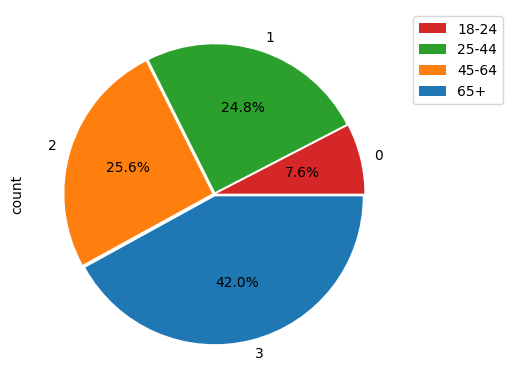

In [63]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_franja_edad_espaciado.png') # Ruta donde se guardará la imagen creada

# Definimos una paleta de colores personalizada para cada categoría de edad
custom_palette = {0: "#d62728", 1: "#2ca02c", 2: "#ff7f0e", 3: "#1f77b4"}

# Ordenamos los valores por 'valor_franja_edad' para que coincidan con la paleta de colores y las etiquetas
sorted_counts = df['valor_franja_edad'].value_counts().sort_index()

# Porción de desplazamiento para cada franja del queso (0 para ninguna separación)
explode = [0.015, 0.015, 0.015, 0.015]

# Mostramos el balanceo de datos 
fig2 = sorted_counts.plot.pie(autopct="%.1f%%", colors=[custom_palette[i] for i in sorted_counts.index], explode=explode)

# Añadimos una leyenda personalizada con los colores correctos
etiquetas_franjas = ['18-24', '25-44', '45-64', '65+']
handles, _ = fig2.get_legend_handles_labels()
plt.legend(handles=handles, labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.3, 1))

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_franja_edad_circulos.png


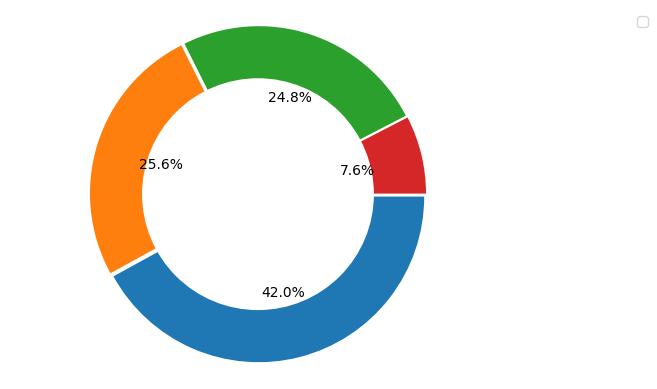

In [62]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_franja_edad_circulos.png') # Ruta donde se guardará la imagen creada

# Definimos una paleta de colores personalizada para cada categoría de edad
custom_palette = {0: "#d62728", 1: "#2ca02c", 2: "#ff7f0e", 3: "#1f77b4"}

# Ordenamos los valores por 'valor_franja_edad' para que coincidan con la paleta de colores y las etiquetas
sorted_counts = df['valor_franja_edad'].value_counts().sort_index()

# Porción de desplazamiento para cada franja del queso (0 para ninguna separación)
explode = [0.015, 0.015, 0.015, 0.015]

# Mostramos el balanceo de datos
fig, ax = plt.subplots()

# Gráfico de pastel
wedges, texts, autotexts = ax.pie(sorted_counts, autopct="%.1f%%", colors=[custom_palette[i] for i in sorted_counts.index], explode=explode)

# Añadimos círculo en el centro para representar el total
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Añadimos una leyenda personalizada con los colores correctos
etiquetas_franjas = ['17-24', '25-44', '45-64', '65+']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.3, 1))


plt.axis('equal')  

fig.savefig(output_file)  # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")



<details>
<summary>Explicación detallada de la variable "edad"</summary>
<p>
A través del gráfico de pastel anterior, se puede observar claramente que la mayoría abrumadora de los usuarios, un 44.4%, pertenecen a la franja de edad de 18 a 24 años. Esta cifra destaca significativamente en comparación con las otras franjas de edad. Tanto los usuarios de 25 a 44 años como los de 45 a 64 años muestran una proporción similar, representando el 24.8% y el 25.6% respectivamente.

Sin embargo, es preocupante que la franja de edad de 18 a 24 años presente un porcentaje tan bajo, apenas un 7.6%. Esto sugiere que estos jóvenes muestran un menor agrado o interés por la aplicación web en comparación con otros grupos de edad.

Estos datos son fundamentales para tomar decisiones informadas sobre posibles ajustes o mejoras dirigidas a la audiencia más joven y para capitalizar el éxito entre el grupo de usuarios más numeroso. El análisis de la distribución por edades proporciona información valiosa para comprender el comportamiento y las preferencias de los usuarios, lo que permitirá mejorar la experiencia global y el alcance de la aplicación web.
</p>
</details>

# MACHINE LEARNING

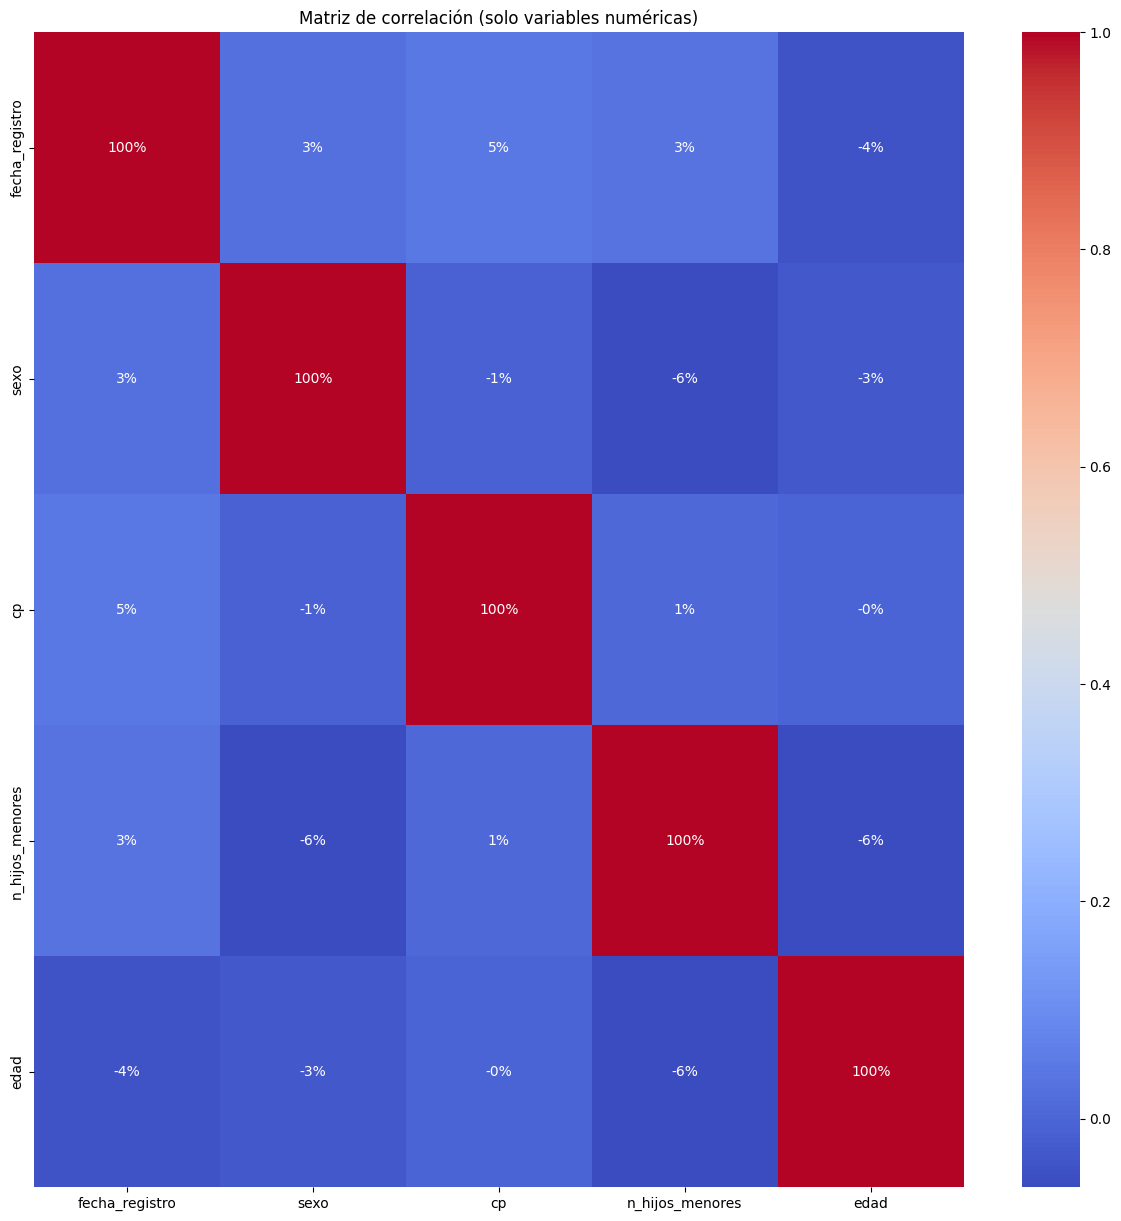

In [50]:
# Calculamos la matriz de correlación para las columnas numéricas
correlation_matrix = df.corr()

# Creamos mapa de calor de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%" )
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()
